# **Step 1 Import data from kaggle**

In [ ]:
# Make sure to upload kaggle.json in Colab, then run these lines
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


## **Unzip the Data Set**

In [ ]:

# Download the dataset
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset
!unzip tuberculosis-tb-chest-xray-dataset.zip -d chest_xray


Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
License(s): copyright-authors
 97% 645M/663M [00:07<00:00, 112MB/s]
100% 663M/663M [00:07<00:00, 87.4MB/s]
Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: chest_xray/TB_Chest_Radiography_D

# **Importing Necessary library**

In [ ]:


# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical


##  **Setting the path**

In [ ]:

# Define paths for each class
normal_path = os.path.join('/content/chest_xray/TB_Chest_Radiography_Database/', 'Normal')
tuberculosis_path = os.path.join('/content/chest_xray/TB_Chest_Radiography_Database/', 'Tuberculosis')

# **Explortry Data Analysis**

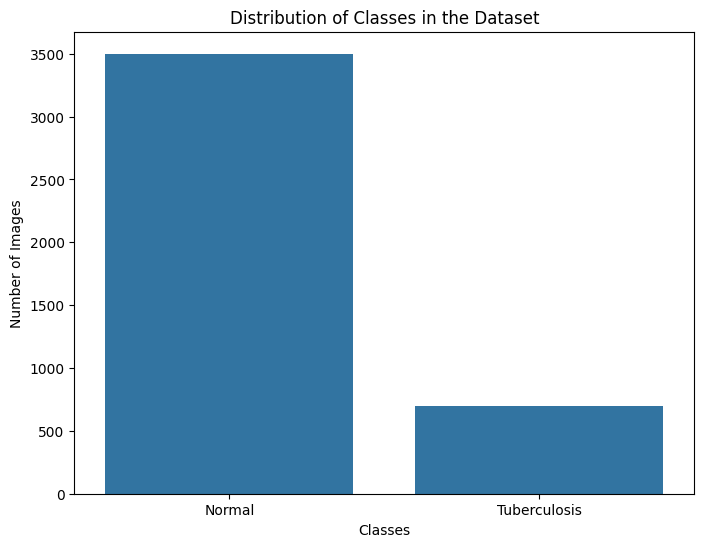

Normal Images:


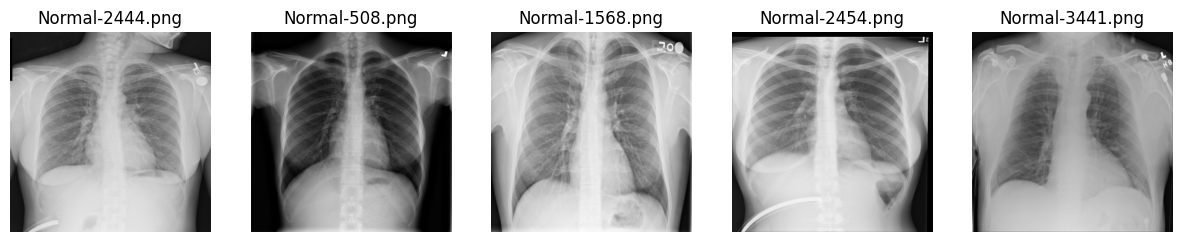

Tuberculosis Images:


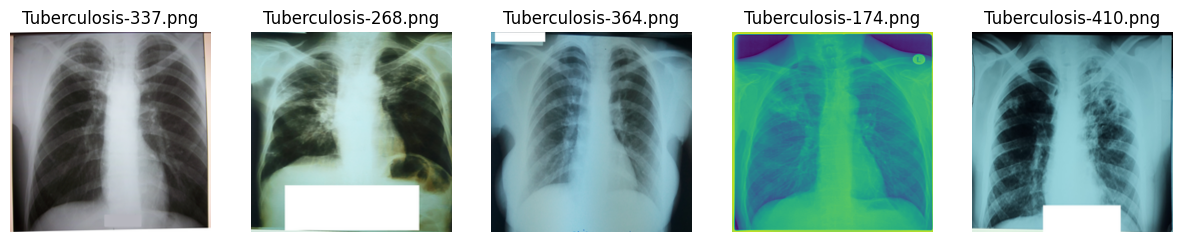

In [ ]:

# Count the number of images in each class
normal_count = len(os.listdir(normal_path))
tuberculosis_count = len(os.listdir(tuberculosis_path))

# Create a bar plot
classes = ['Normal', 'Tuberculosis']
counts = [normal_count, tuberculosis_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=classes, y=counts)
plt.title('Distribution of Classes in the Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.show()

# Example to display random images from each class (optional)
def display_random_images(path, num_images=5):
  images = os.listdir(path)
  random_images = random.sample(images, num_images)
  plt.figure(figsize=(15, 5))

  for i, image_name in enumerate(random_images):
      image_path = os.path.join(path, image_name)
      img = plt.imread(image_path)
      plt.subplot(1, num_images, i + 1)
      plt.imshow(img)
      plt.title(image_name)
      plt.axis('off')

  plt.show()

print("Normal Images:")
display_random_images(normal_path)
print("Tuberculosis Images:")
display_random_images(tuberculosis_path)

In [ ]:
# prompt: write the code to count t the number of images in the both class

import os

# Define paths for each class
normal_path = os.path.join('/content/chest_xray/TB_Chest_Radiography_Database/', 'Normal')
tuberculosis_path = os.path.join('/content/chest_xray/TB_Chest_Radiography_Database/', 'Tuberculosis')

# Count the number of images in each class
normal_count = len(os.listdir(normal_path))
tuberculosis_count = len(os.listdir(tuberculosis_path))

print(f"Number of normal images: {normal_count}")
print(f"Number of tuberculosis images: {tuberculosis_count}")

Number of normal images: 3500
Number of tuberculosis images: 700


In [ ]:

# Define the path to the dataset folder
dataset_path = "/content/chest_xray/TB_Chest_Radiography_Database"


# Define the list of label folders in the dataset folder
label_folders = ["Normal", "Tuberculosis"]

# Define the size of the input images
img_height = 128
img_width = 128

# Define an empty list to store the images and their labels
data = []
labels = []

# Loop over the label folders in the dataset folder
for label_folder in label_folders:
    # Define the path to the label folder
    label_path = os.path.join(dataset_path, label_folder)
    # Loop over the images in the label folder
    for img_name in os.listdir(label_path):
        # Define the path to the image
        img_path = os.path.join(label_path, img_name)
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        # Append the image and its label to the data and labels lists
        data.append(img)
        labels.append(label_folder)

# Convert the data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Convert the labels to one-hot encoded vectors
# labels = to_categorical(labels)

# Print the shape of the data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (4200, 128, 128, 3)
Labels shape: (4200,)


In [ ]:
import numpy as np


# Get the unique string values
unique_values = np.unique(labels)

# Create a mapping dictionary
mapping = {value: index for index, value in enumerate(unique_values)}

# Map the string values to numbers
mapped_arr = np.array([mapping[value] for value in labels])

print("Original array:", labels)
print("Mapped array:", mapped_arr)
print("Mapping dictionary:", mapping)

Original array: ['Normal' 'Normal' 'Normal' ... 'Tuberculosis' 'Tuberculosis'
 'Tuberculosis']
Mapped array: [0 0 0 ... 1 1 1]
Mapping dictionary: {'Normal': 0, 'Tuberculosis': 1}


# **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
import time
X_train, X_test, Y_train, Y_test = train_test_split(data,mapped_arr, test_size = 0.2,random_state=0,shuffle=True)

# **Model Evalute with Different OPtimizer**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.applications import VGG16, MobileNet, EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model
import time



# **Define The model Structure**

In [ ]:


# Define the models
def create_cnn_model():
    input_shape = (128, 128, 3)
    model = Sequential([
        Conv2D(128, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.02),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_vgg16_model():
    input_shape = (128, 128, 3)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_mobilenet_model():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_efficientnet_model():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    return model


## **Model Creation**

In [ ]:
# Model names and creation functions
models = {
    "CNN": create_cnn_model,
    "VGG16": create_vgg16_model,
    "MobileNet": create_mobilenet_model,
    "EfficientNet": create_efficientnet_model
}

### ***print the model Artichtuer diagram***

In [ ]:

from tensorflow.keras.utils import plot_model
import os

for model_name, model_func in models.items():
  print(f"\nArchitecture of {model_name} model:")
  model = model_func()
  model.summary()
  # Save the architecture plot
  plot_filename = f"{model_name}_architecture.png"
  plot_model(model, to_file=plot_filename, show_shapes=True, show_layer_names=True)
  print(f"Architecture plot saved to: {plot_filename}")


Architecture of CNN model:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 508032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │         508,033 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 511,617 (1.95 MB)

 Trainable params: 511,617 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

Architecture plot saved to: CNN_architecture.png

Architecture of VGG16 model:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Architecture plot saved to: VGG16_architecture.png

Architecture of MobileNet model:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional)      │ (None, 4, 4, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,618,497 (44.32 MB)

 Trainable params: 8,389,633 (32.00 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

Architecture plot saved to: MobileNet_architecture.png

Architecture of EfficientNet model:


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 128, 128, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,705,956 (17.95 MB)

 Trainable params: 656,385 (2.50 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.408281 to fit

Architecture plot saved to: EfficientNet_architecture.png


# **Define The Optimizer**

In [ ]:
!pip install tensorflow-addons
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad # Import optimizers


# Lower learning rate
learning_rate = 0.0001  # Adjust as needed



# Define a dictionary of optimizers
optimizers = {
    "Adam": Adam(learning_rate=learning_rate),
    "SGD": SGD(learning_rate=learning_rate),
    "RMSprop": RMSprop(learning_rate=learning_rate),
    "Adagrad": Adagrad(learning_rate=learning_rate)
}

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


# **Evalute CNN model with all optimizer**

Evaluating CNN with Adam )...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - Precision: 0.4289 - Recall: 0.4245 - accuracy: 0.8014 - loss: 48.2198 - val_Precision: 0.8627 - val_Recall: 0.8408 - val_accuracy: 0.9452 - val_loss: 3.6670
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - Precision: 0.8282 - Recall: 0.8361 - accuracy: 0.9462 - loss: 2.7031 - val_Precision: 0.9221 - val_Recall: 0.9045 - val_accuracy: 0.9679 - val_loss: 1.4245
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - Precision: 0.9185 - Recall: 0.9136 - accuracy: 0.9740 - loss: 0.5520 - val_Precision: 0.9627 - val_Recall: 0.8217 - val_accuracy: 0.9607 - val_loss: 0.9759
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - Precision: 0.9473 - Recall: 0.9349 - accuracy: 0.9809 - loss: 0.2474 - val_Precision: 0.9202 - val_Recall: 0.9554 - val_accuracy: 0.9762 - val_loss: 0.7374
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - Precision: 0.9410 - Recall: 0.9476 - accuracy: 0.9815 - loss: 0.2155 - val_Precision: 0.9722 - val_R

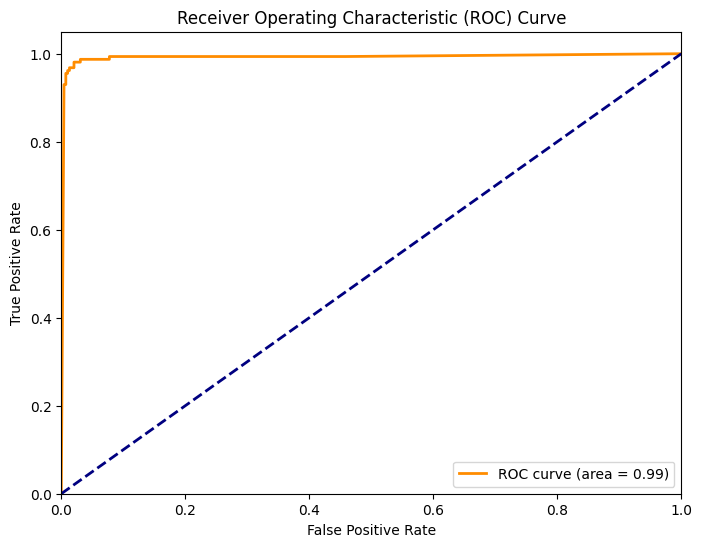

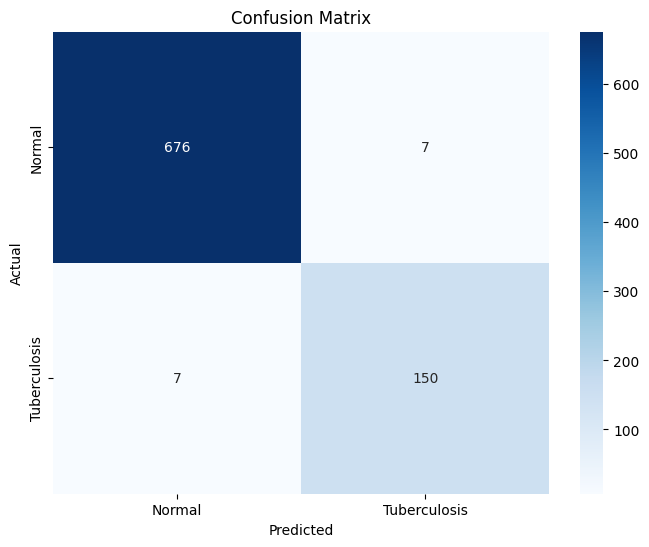

------------------------------
Evaluating CNN with SGD )...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - Precision: 0.5556 - Recall: 0.5724 - accuracy: 0.8481 - loss: 36.4778 - val_Precision: 0.8839 - val_Recall: 0.8726 - val_accuracy: 0.9548 - val_loss: 0.1389
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - Precision: 0.9100 - Recall: 0.8593 - accuracy: 0.9636 - loss: 0.0901 - val_Precision: 0.9296 - val_Recall: 0.8408 - val_accuracy: 0.9583 - val_loss: 0.1220
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - Precision: 0.9754 - Recall: 0.9192 - accuracy: 0.9833 - loss: 0.0467 - val_Precision: 0.9267 - val_Recall: 0.8854 - val_accuracy: 0.9655 - val_loss: 0.1049
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - Precision: 0.9728 - Recall: 0.9401 - accuracy: 0.9863 - loss: 0.0380 - val_Precision: 0.9640 - val_Recall: 0.6815 - val_accuracy: 0.9357 - val_loss: 0.2116
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - Precision: 0.9883 - Recall: 0.9596 - accuracy: 0.9919 - loss: 0.0325 - val_Precision: 0.8810 - val_R

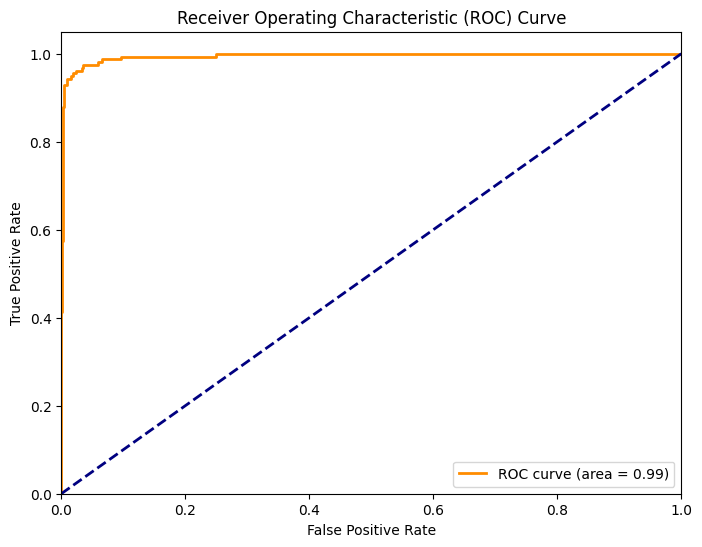

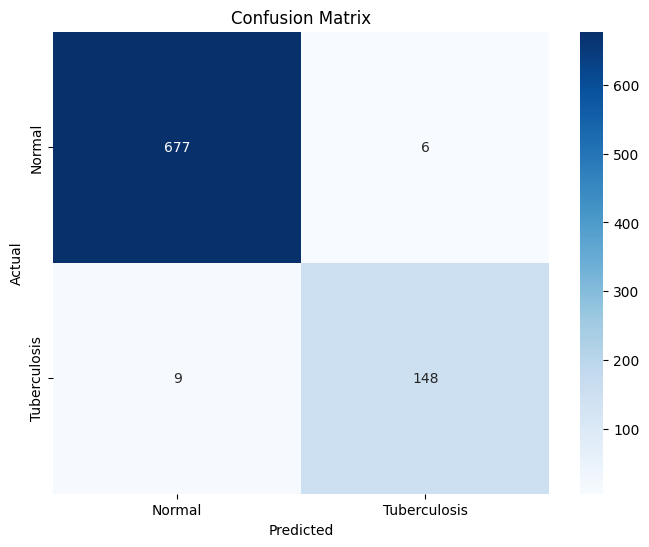

------------------------------
Evaluating CNN with RMSprop )...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - Precision: 0.3505 - Recall: 0.4091 - accuracy: 0.7829 - loss: 120.0133 - val_Precision: 0.8095 - val_Recall: 0.8662 - val_accuracy: 0.9369 - val_loss: 5.5796
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - Precision: 0.7060 - Recall: 0.7112 - accuracy: 0.9067 - loss: 12.8306 - val_Precision: 0.5692 - val_Recall: 0.9427 - val_accuracy: 0.8560 - val_loss: 8.8843
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - Precision: 0.7553 - Recall: 0.7684 - accuracy: 0.9215 - loss: 6.4388 - val_Precision: 0.9846 - val_Recall: 0.4076 - val_accuracy: 0.8881 - val_loss: 13.4022
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - Precision: 0.8576 - Recall: 0.8426 - accuracy: 0.9488 - loss: 2.4042 - val_Precision: 0.9853 - val_Recall: 0.4268 - val_accuracy: 0.8917 - val_loss: 7.0651
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - Precision: 0.9303 - Recall: 0.8971 - accuracy: 0.9713 - loss: 0.7016 - val_Precision: 0.9603 - va

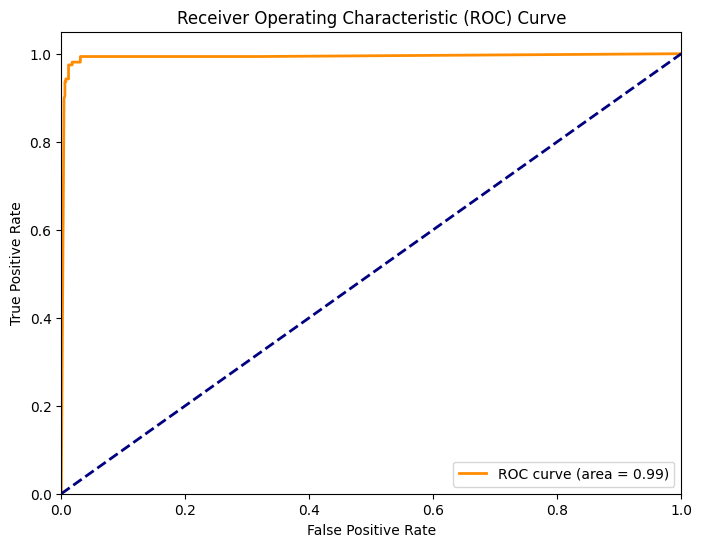

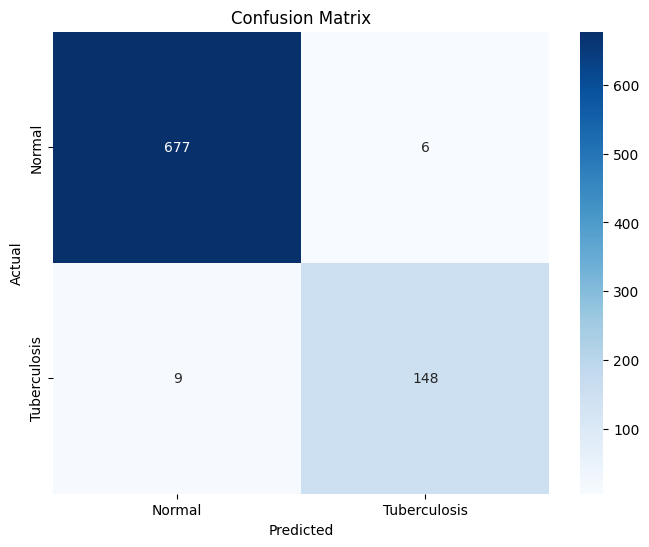

------------------------------
Evaluating CNN with Adagrad )...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - Precision: 0.5300 - Recall: 0.5342 - accuracy: 0.8362 - loss: 15.9827 - val_Precision: 0.9211 - val_Recall: 0.6688 - val_accuracy: 0.9274 - val_loss: 0.9685
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - Precision: 0.7581 - Recall: 0.7363 - accuracy: 0.9152 - loss: 1.3458 - val_Precision: 0.9197 - val_Recall: 0.8025 - val_accuracy: 0.9500 - val_loss: 0.6044
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - Precision: 0.8340 - Recall: 0.8191 - accuracy: 0.9474 - loss: 0.5158 - val_Precision: 0.9060 - val_Recall: 0.8599 - val_accuracy: 0.9571 - val_loss: 0.4686
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - Precision: 0.8207 - Recall: 0.7985 - accuracy: 0.9380 - loss: 0.5805 - val_Precision: 0.9184 - val_Recall: 0.8599 - val_accuracy: 0.9595 - val_loss: 0.4519
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - Precision: 0.8749 - Recall: 0.8681 - accuracy: 0.9560 - loss: 0.3616 - val_Precision: 0.8232 - val_R

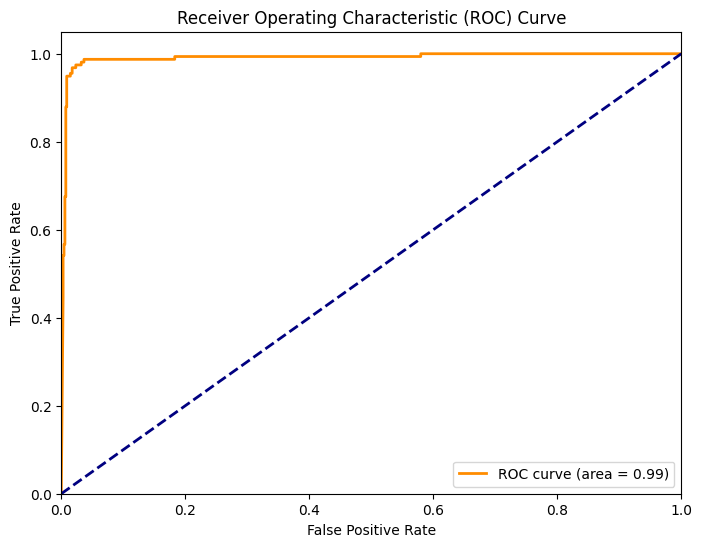

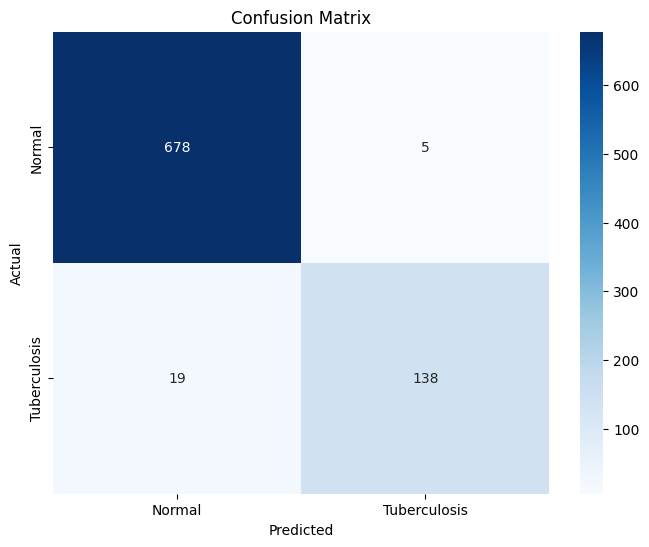

------------------------------
Evaluating VGG16 with Adam )...
Epoch 1/20


ValueError: Unknown variable: <KerasVariable shape=(8192, 256), dtype=float32, path=sequential_10/dense_11/kernel>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

In [ ]:


for model_name, create_model_func in models.items():
    for optimizer_name, optimizer in optimizers.items():

            print(f"Evaluating {model_name} with {optimizer_name} )...")

            model = create_model_func()

            # Move model.compile inside the inner loop
            model.compile(optimizer=optimizer, loss='binary_crossentropy',
                          metrics=['accuracy', 'Precision', 'Recall'])

            start_time = time.time()



            history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=32)

            end_time = time.time()
            training_time = end_time - start_time
            print(f"Training time: {training_time:.2f} seconds")

            y_pred = model.predict(X_test)
            y_pred_classes = (y_pred > 0.5).astype(int).flatten()
            end_time = time.time()
            training_time = end_time - start_time
            print(f"Training time: {training_time:.2f} seconds")

            y_pred = model.predict(X_test)
            y_pred_classes = (y_pred > 0.5).astype(int).flatten()

            # Calculate and print metrics
            accuracy = accuracy_score(Y_test, y_pred_classes)
            precision = precision_score(Y_test, y_pred_classes)
            recall = recall_score(Y_test, y_pred_classes)
            f1 = f1_score(Y_test, y_pred_classes)
            roc_auc = roc_auc_score(Y_test, y_pred)

            print(f"\n{model_name} Results:")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"ROC AUC: {roc_auc:.4f}")



            # Classification report (includes precision, recall, F1-score)
            print("\nClassification Report:\n", classification_report(Y_test, y_pred_classes))

            # ROC curve
            fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()

            # Confusion matrix
            cm = confusion_matrix(Y_test, y_pred_classes)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tuberculosis'], yticklabels=['Normal', 'Tuberculosis'])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix')
            plt.show()


            print("-" * 30)

# **VGG16 Model with All optimizer**

In [ ]:
# Model names and creation functions
models = {

    "VGG16": create_vgg16_model,

}

Evaluating VGG16 with Adam )...
Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - Precision: 0.6874 - Recall: 0.6172 - accuracy: 0.8976 - loss: 1.4683 - val_Precision: 0.9648 - val_Recall: 0.8726 - val_accuracy: 0.9702 - val_loss: 0.2695
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - Precision: 0.9574 - Recall: 0.9116 - accuracy: 0.9780 - loss: 0.1788 - val_Precision: 0.9737 - val_Recall: 0.9427 - val_accuracy: 0.9845 - val_loss: 0.1179
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - Precision: 0.9577 - Recall: 0.9347 - accuracy: 0.9831 - loss: 0.1065 - val_Precision: 0.9500 - val_Recall: 0.9682 - val_accuracy: 0.9845 - val_loss: 0.0957
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - Precision: 0.9804 - Recall: 0.9744 - accuracy: 0.9925 - loss: 0.0462 - val_Precision: 0.9739 - val_Recall: 0.9490 - val_accuracy: 0.9857 - val_loss: 0.0876
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - Precision: 0.9813 - Recall: 0.9902 - accuracy: 0.9952 - loss: 0.024

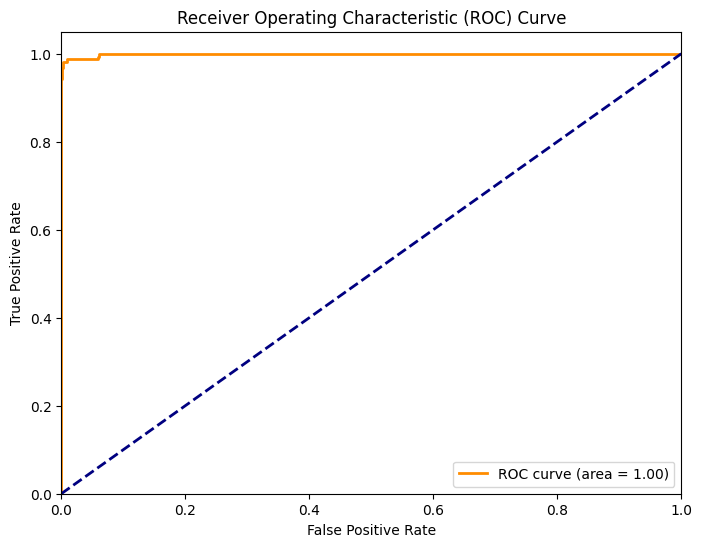

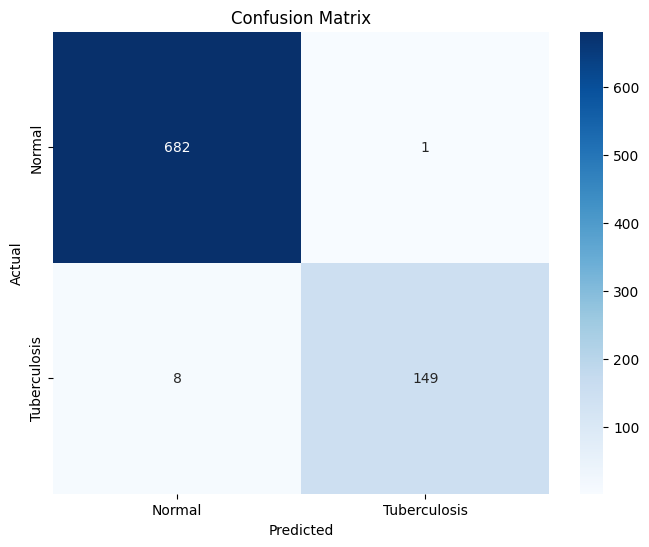

------------------------------
Evaluating VGG16 with SGD )...
Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - Precision: 0.4253 - Recall: 0.3764 - accuracy: 0.8124 - loss: 2.3706 - val_Precision: 0.8974 - val_Recall: 0.6688 - val_accuracy: 0.9238 - val_loss: 0.5826
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - Precision: 0.7848 - Recall: 0.7183 - accuracy: 0.9202 - loss: 0.6425 - val_Precision: 0.8616 - val_Recall: 0.8726 - val_accuracy: 0.9500 - val_loss: 0.3173
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - Precision: 0.8299 - Recall: 0.8036 - accuracy: 0.9417 - loss: 0.4604 - val_Precision: 0.9110 - val_Recall: 0.8471 - val_accuracy: 0.9560 - val_loss: 0.2840
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - Precision: 0.8720 - Recall: 0.8503 - accuracy: 0.9561 - loss: 0.3075 - val_Precision: 0.9310 - val_Recall: 0.8599 - val_accuracy: 0.9619 - val_loss: 0.2550
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - Precision: 0.8795 - Recall: 0.8459 - a

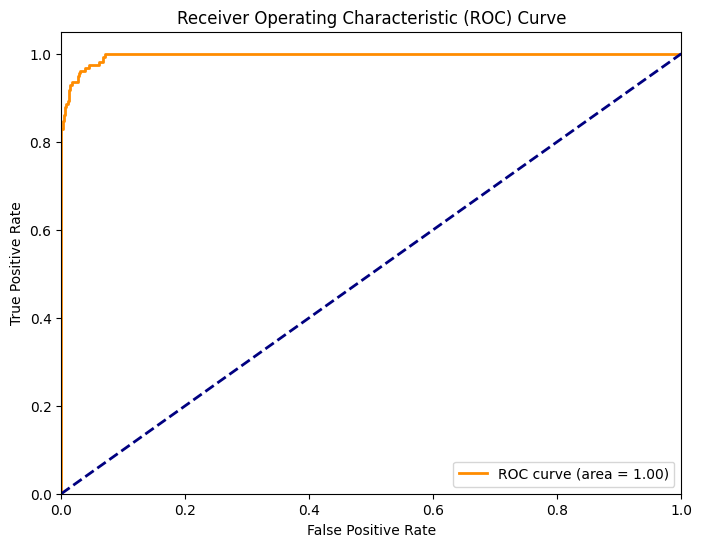

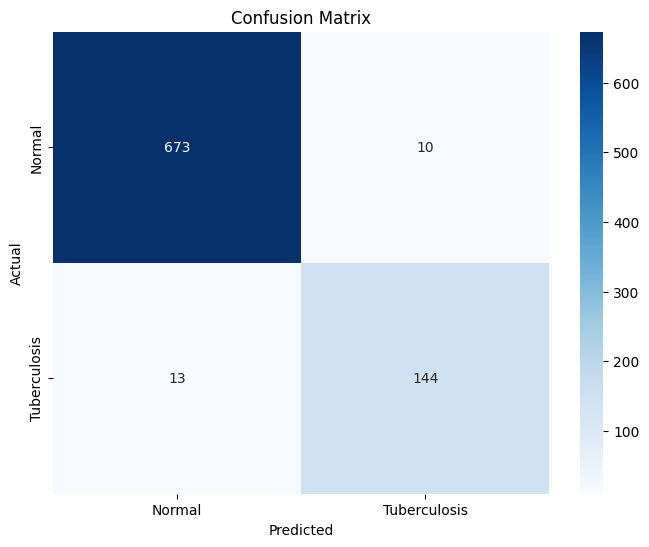

------------------------------
Evaluating VGG16 with RMSprop )...
Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - Precision: 0.7348 - Recall: 0.6785 - accuracy: 0.9081 - loss: 1.1179 - val_Precision: 0.8728 - val_Recall: 0.9618 - val_accuracy: 0.9667 - val_loss: 0.2023
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - Precision: 0.9050 - Recall: 0.9258 - accuracy: 0.9736 - loss: 0.1729 - val_Precision: 0.9658 - val_Recall: 0.8981 - val_accuracy: 0.9750 - val_loss: 0.1336
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - Precision: 0.9647 - Recall: 0.9560 - accuracy: 0.9871 - loss: 0.0764 - val_Precision: 0.9682 - val_Recall: 0.9682 - val_accuracy: 0.9881 - val_loss: 0.0859
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - Precision: 0.9612 - Recall: 0.9681 - accuracy: 0.9884 - loss: 0.0474 - val_Precision: 0.9740 - val_Recall: 0.9554 - val_accuracy: 0.9869 - val_loss: 0.0982
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - Precision: 0.9726 - Recall: 0.967

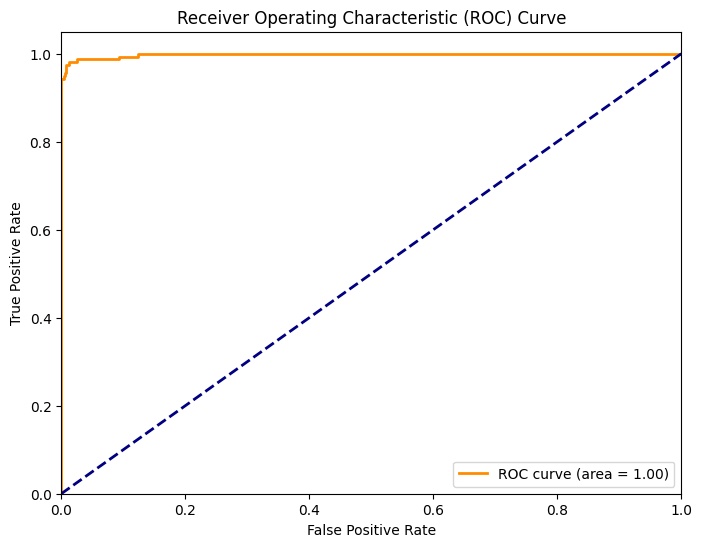

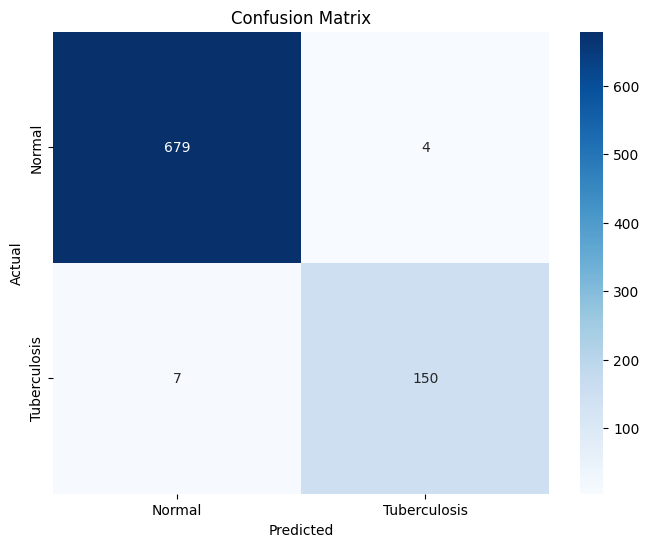

------------------------------
Evaluating VGG16 with Adagrad )...
Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - Precision: 0.3841 - Recall: 0.3432 - accuracy: 0.7818 - loss: 2.9234 - val_Precision: 0.9082 - val_Recall: 0.5669 - val_accuracy: 0.9083 - val_loss: 0.7472
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - Precision: 0.7328 - Recall: 0.6451 - accuracy: 0.9076 - loss: 0.8617 - val_Precision: 0.9180 - val_Recall: 0.7134 - val_accuracy: 0.9345 - val_loss: 0.4724
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - Precision: 0.7796 - Recall: 0.7173 - accuracy: 0.9195 - loss: 0.6481 - val_Precision: 0.9160 - val_Recall: 0.7643 - val_accuracy: 0.9429 - val_loss: 0.3764
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - Precision: 0.8103 - Recall: 0.7809 - accuracy: 0.9335 - loss: 0.5511 - val_Precision: 0.9444 - val_Recall: 0.7580 - val_accuracy: 0.9464 - val_loss: 0.3670
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - Precision: 0.8035 - Recall: 0.759

In [ ]:
!pip install tensorflow-addons
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad # Import optimizers


# Lower learning rate
learning_rate = 0.0001  # Adjust as needed



# Define a dictionary of optimizers
optimizers = {
    "Adam": Adam(learning_rate=learning_rate),
    "SGD": SGD(learning_rate=learning_rate),
    "RMSprop": RMSprop(learning_rate=learning_rate),
    "Adagrad": Adagrad(learning_rate=learning_rate)
}

for model_name, create_model_func in models.items():
    for optimizer_name, optimizer in optimizers.items():

            print(f"Evaluating {model_name} with {optimizer_name} )...")

            model = create_model_func()

            # Move model.compile inside the inner loop
            model.compile(optimizer=optimizer, loss='binary_crossentropy',
                          metrics=['accuracy', 'Precision', 'Recall'])

            start_time = time.time()



            history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=32)

            end_time = time.time()
            training_time = end_time - start_time
            print(f"Training time: {training_time:.2f} seconds")

            y_pred = model.predict(X_test)
            y_pred_classes = (y_pred > 0.5).astype(int).flatten()
            end_time = time.time()
            training_time = end_time - start_time
            print(f"Training time: {training_time:.2f} seconds")

            y_pred = model.predict(X_test)
            y_pred_classes = (y_pred > 0.5).astype(int).flatten()

            # Calculate and print metrics
            accuracy = accuracy_score(Y_test, y_pred_classes)
            precision = precision_score(Y_test, y_pred_classes)
            recall = recall_score(Y_test, y_pred_classes)
            f1 = f1_score(Y_test, y_pred_classes)
            roc_auc = roc_auc_score(Y_test, y_pred)

            print(f"\n{model_name} Results:")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"ROC AUC: {roc_auc:.4f}")



            # Classification report (includes precision, recall, F1-score)
            print("\nClassification Report:\n", classification_report(Y_test, y_pred_classes))

            # ROC curve
            fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()

            # Confusion matrix
            cm = confusion_matrix(Y_test, y_pred_classes)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tuberculosis'], yticklabels=['Normal', 'Tuberculosis'])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix')
            plt.show()


            print("-" * 30)

Evaluating VGG16 with Adagrad )...
Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - Precision: 0.4555 - Recall: 0.3456 - accuracy: 0.8361 - loss: 2.0044 - val_Precision: 0.9474 - val_Recall: 0.6879 - val_accuracy: 0.9345 - val_loss: 0.5079
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - Precision: 0.7312 - Recall: 0.6588 - accuracy: 0.9034 - loss: 0.8183 - val_Precision: 0.9353 - val_Recall: 0.8280 - val_accuracy: 0.9571 - val_loss: 0.3175
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - Precision: 0.8167 - Recall: 0.8027 - accuracy: 0.9428 - loss: 0.4729 - val_Precision: 0.9708 - val_Recall: 0.8471 - val_accuracy: 0.9667 - val_loss: 0.2903
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - Precision: 0.8296 - Recall: 0.8081 - accuracy: 0.9426 - loss: 0.4743 - val_Precision: 0.9714 - val_Recall: 0.8662 - val_accuracy: 0.9702 - val_loss: 0.2788
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - Precision: 0.8321 - Recall: 0.8340 - accuracy: 0.9479 - loss: 0.

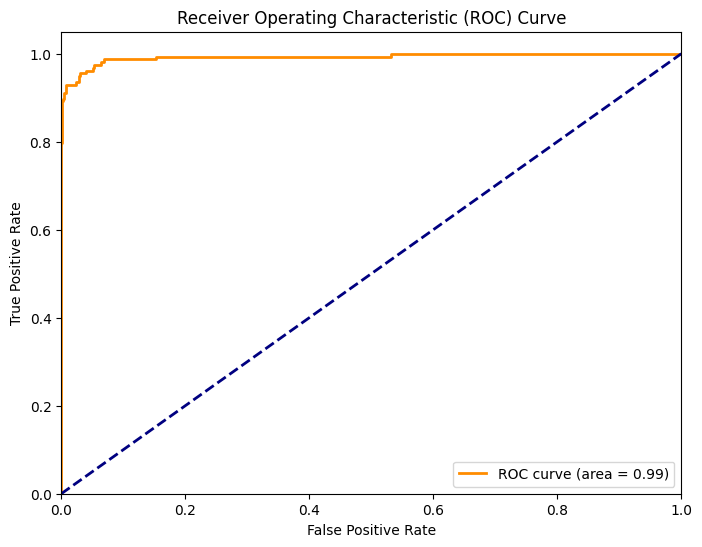

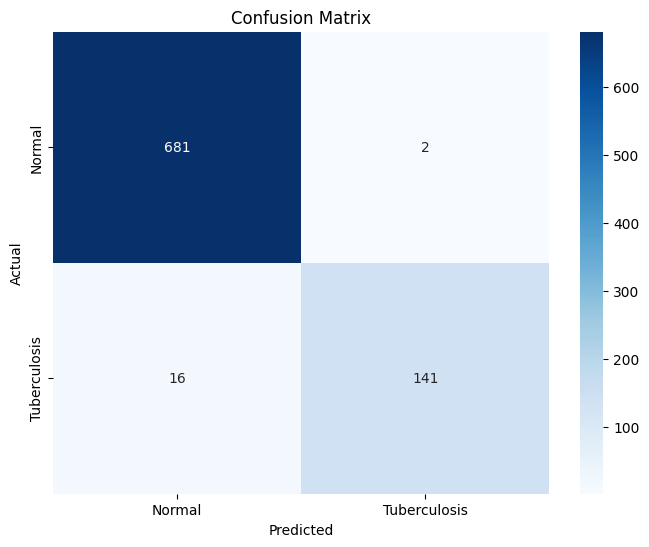

------------------------------
Evaluating MobileNet with Adagrad )...
Epoch 1/20


ValueError: Unknown variable: <KerasVariable shape=(16384, 512), dtype=float32, path=sequential_17/dense_25/kernel>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

In [ ]:
!pip install tensorflow-addons
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad # Import optimizers


# Lower learning rate
learning_rate = 0.0001  # Adjust as needed



# Define a dictionary of optimizers
optimizers = {

    "Adagrad": Adagrad(learning_rate=learning_rate)
}

for model_name, create_model_func in models.items():
    for optimizer_name, optimizer in optimizers.items():

            print(f"Evaluating {model_name} with {optimizer_name} )...")

            model = create_model_func()

            # Move model.compile inside the inner loop
            model.compile(optimizer=optimizer, loss='binary_crossentropy',
                          metrics=['accuracy', 'Precision', 'Recall'])

            start_time = time.time()



            history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=32)

            end_time = time.time()
            training_time = end_time - start_time
            print(f"Training time: {training_time:.2f} seconds")

            y_pred = model.predict(X_test)
            y_pred_classes = (y_pred > 0.5).astype(int).flatten()
            end_time = time.time()
            training_time = end_time - start_time
            print(f"Training time: {training_time:.2f} seconds")

            y_pred = model.predict(X_test)
            y_pred_classes = (y_pred > 0.5).astype(int).flatten()

            # Calculate and print metrics
            accuracy = accuracy_score(Y_test, y_pred_classes)
            precision = precision_score(Y_test, y_pred_classes)
            recall = recall_score(Y_test, y_pred_classes)
            f1 = f1_score(Y_test, y_pred_classes)
            roc_auc = roc_auc_score(Y_test, y_pred)

            print(f"\n{model_name} Results:")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"ROC AUC: {roc_auc:.4f}")



            # Classification report (includes precision, recall, F1-score)
            print("\nClassification Report:\n", classification_report(Y_test, y_pred_classes))

            # ROC curve
            fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()

            # Confusion matrix
            cm = confusion_matrix(Y_test, y_pred_classes)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tuberculosis'], yticklabels=['Normal', 'Tuberculosis'])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix')
            plt.show()


            print("-" * 30)

## **MobileNet with All optimizer**

In [ ]:
# Model names and creation functions
models = {

    "MobileNet": create_mobilenet_model,

}

Evaluating MobileNet with Adam )...
Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - Precision: 0.7778 - Recall: 0.7125 - accuracy: 0.9100 - loss: 0.2872 - val_Precision: 1.0000 - val_Recall: 0.8344 - val_accuracy: 0.9690 - val_loss: 0.1075
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - Precision: 0.9485 - Recall: 0.9222 - accuracy: 0.9789 - loss: 0.0590 - val_Precision: 0.9866 - val_Recall: 0.9363 - val_accuracy: 0.9857 - val_loss: 0.0392
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - Precision: 0.9781 - Recall: 0.9674 - accuracy: 0.9911 - loss: 0.0275 - val_Precision: 1.0000 - val_Recall: 0.9045 - val_accuracy: 0.9821 - val_loss: 0.0513
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - Precision: 0.9878 - Recall: 0.9743 - accuracy: 0.9938 - loss: 0.0184 - val_Precision: 1.0000 - val_Recall: 0.9363 - val_accuracy: 0.9881 - val_loss: 0.0408
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - Precision: 0.9907 - Recall: 0.9680 - accuracy: 0.9930 - loss: 0

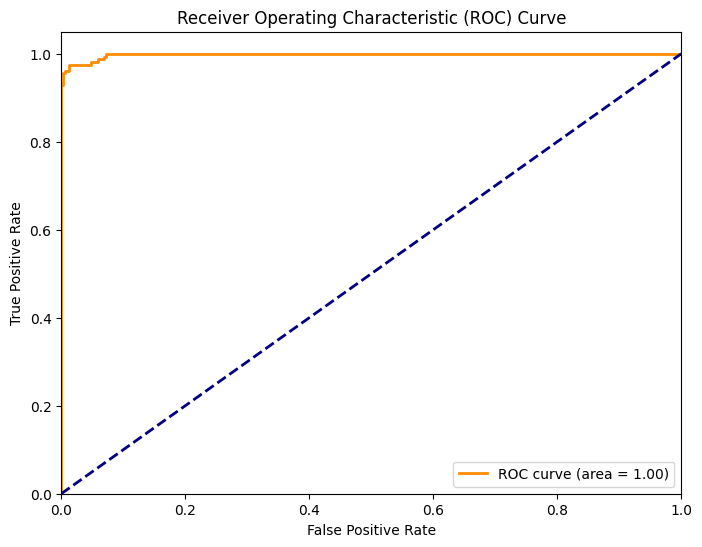

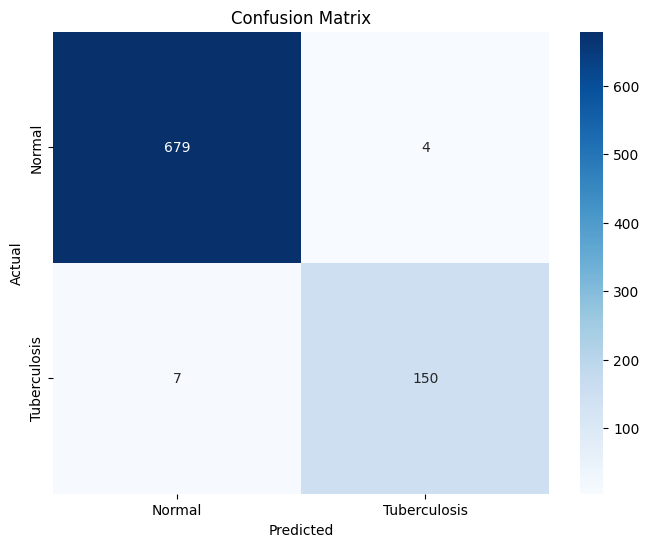

------------------------------
Evaluating MobileNet with SGD )...
Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - Precision: 0.3537 - Recall: 0.5097 - accuracy: 0.7393 - loss: 0.6429 - val_Precision: 0.9737 - val_Recall: 0.4713 - val_accuracy: 0.8988 - val_loss: 0.2762
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - Precision: 0.7347 - Recall: 0.5231 - accuracy: 0.9031 - loss: 0.2828 - val_Precision: 0.9750 - val_Recall: 0.4968 - val_accuracy: 0.9036 - val_loss: 0.2130
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - Precision: 0.7708 - Recall: 0.5959 - accuracy: 0.9062 - loss: 0.2399 - val_Precision: 0.9783 - val_Recall: 0.5732 - val_accuracy: 0.9179 - val_loss: 0.1908
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - Precision: 0.8292 - Recall: 0.6257 - accuracy: 0.9197 - loss: 0.2148 - val_Precision: 0.9789 - val_Recall: 0.5924 - val_accuracy: 0.9214 - val_loss: 0.1794
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - Precision: 0.8748 - Recall: 0.6749 

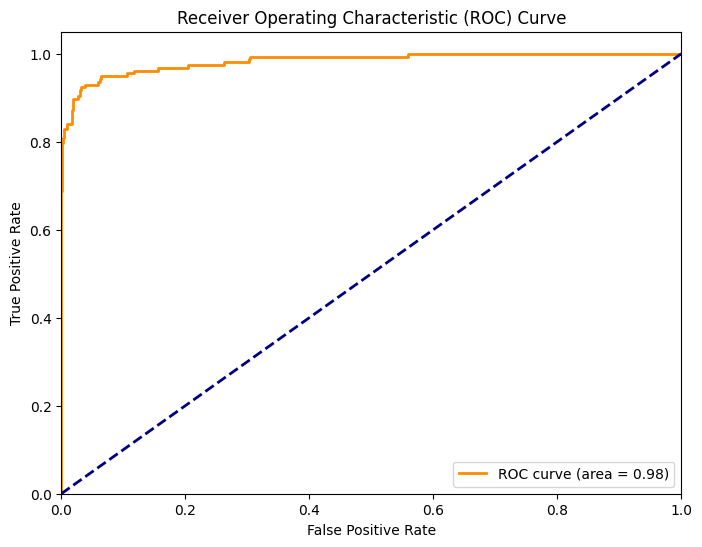

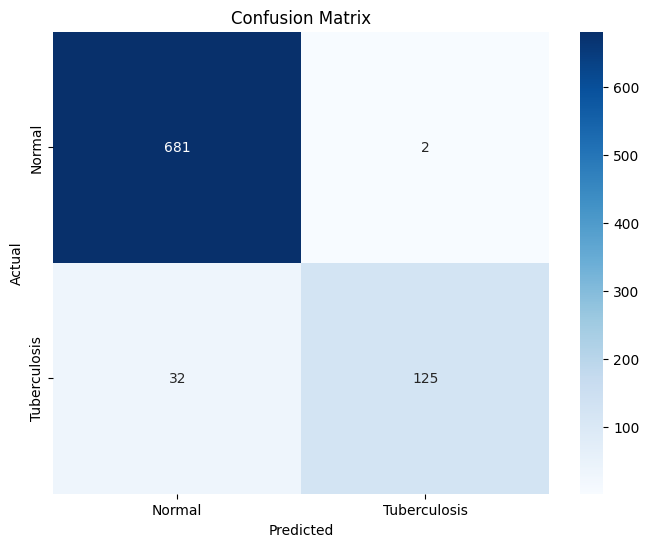

------------------------------
Evaluating MobileNet with RMSprop )...
Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - Precision: 0.7403 - Recall: 0.7003 - accuracy: 0.8991 - loss: 0.3888 - val_Precision: 0.8817 - val_Recall: 0.9490 - val_accuracy: 0.9667 - val_loss: 0.0953
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - Precision: 0.9104 - Recall: 0.8806 - accuracy: 0.9671 - loss: 0.0736 - val_Precision: 0.9862 - val_Recall: 0.9108 - val_accuracy: 0.9810 - val_loss: 0.0607
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - Precision: 0.9672 - Recall: 0.9488 - accuracy: 0.9870 - loss: 0.0403 - val_Precision: 0.9735 - val_Recall: 0.9363 - val_accuracy: 0.9833 - val_loss: 0.0447
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - Precision: 0.9769 - Recall: 0.9634 - accuracy: 0.9905 - loss: 0.0238 - val_Precision: 0.9613 - val_Recall: 0.9490 - val_accuracy: 0.9833 - val_loss: 0.0540
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - Precision: 0.9547 - Recall: 0.9

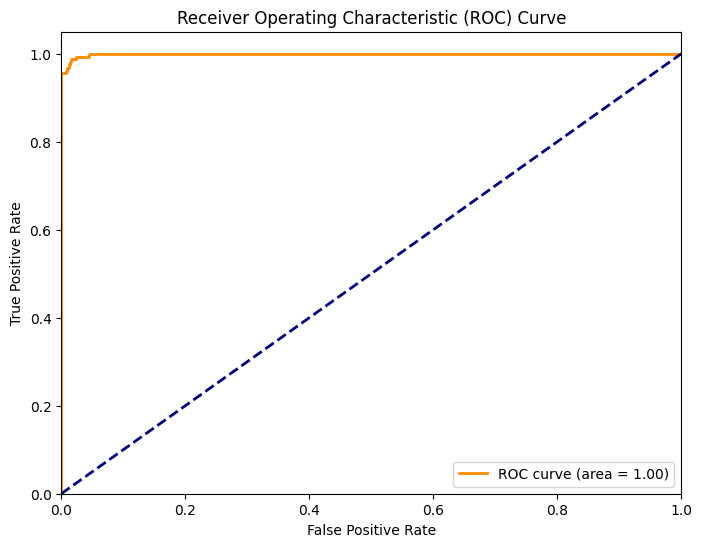

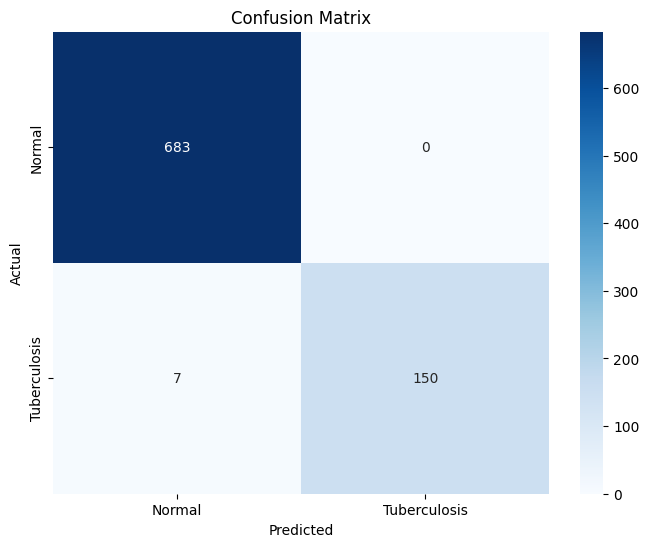

------------------------------
Evaluating MobileNet with Adagrad )...
Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - Precision: 0.5312 - Recall: 0.3644 - accuracy: 0.8405 - loss: 0.4114 - val_Precision: 0.9271 - val_Recall: 0.5669 - val_accuracy: 0.9107 - val_loss: 0.2181
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - Precision: 0.8483 - Recall: 0.6360 - accuracy: 0.9202 - loss: 0.2268 - val_Precision: 0.9196 - val_Recall: 0.6561 - val_accuracy: 0.9250 - val_loss: 0.1842
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - Precision: 0.8787 - Recall: 0.7289 - accuracy: 0.9370 - loss: 0.1811 - val_Precision: 0.9316 - val_Recall: 0.6943 - val_accuracy: 0.9333 - val_loss: 0.1719
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - Precision: 0.8928 - Recall: 0.7469 - accuracy: 0.9490 - loss: 0.1455 - val_Precision: 0.9242 - val_Recall: 0.7771 - val_accuracy: 0.9464 - val_loss: 0.1539
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - Precision: 0.8645 - Recall: 0.7

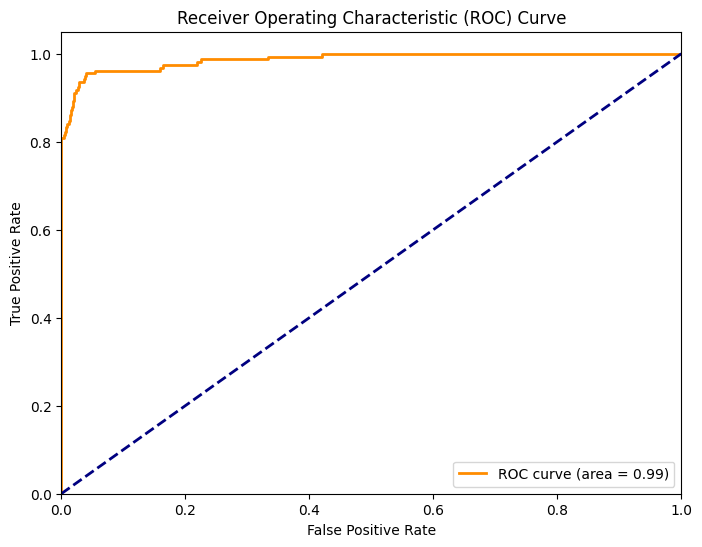

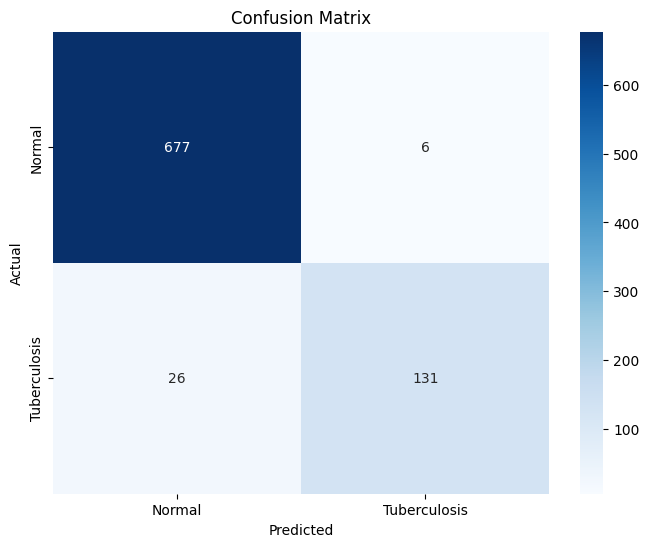

------------------------------


In [ ]:

# Lower learning rate
learning_rate = 0.0001  # Adjust as needed



# Define a dictionary of optimizers
optimizers = {
    "Adam": Adam(learning_rate=learning_rate),
    "SGD": SGD(learning_rate=learning_rate),
    "RMSprop": RMSprop(learning_rate=learning_rate),
    "Adagrad": Adagrad(learning_rate=learning_rate)
}

for model_name, create_model_func in models.items():
    for optimizer_name, optimizer in optimizers.items():

            print(f"Evaluating {model_name} with {optimizer_name} )...")

            model = create_model_func()

            # Move model.compile inside the inner loop
            model.compile(optimizer=optimizer, loss='binary_crossentropy',
                          metrics=['accuracy', 'Precision', 'Recall'])

            start_time = time.time()



            history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=32)

            end_time = time.time()
            training_time = end_time - start_time
            print(f"Training time: {training_time:.2f} seconds")

            y_pred = model.predict(X_test)
            y_pred_classes = (y_pred > 0.5).astype(int).flatten()
            end_time = time.time()
            training_time = end_time - start_time
            print(f"Training time: {training_time:.2f} seconds")

            y_pred = model.predict(X_test)
            y_pred_classes = (y_pred > 0.5).astype(int).flatten()

            # Calculate and print metrics
            accuracy = accuracy_score(Y_test, y_pred_classes)
            precision = precision_score(Y_test, y_pred_classes)
            recall = recall_score(Y_test, y_pred_classes)
            f1 = f1_score(Y_test, y_pred_classes)
            roc_auc = roc_auc_score(Y_test, y_pred)

            print(f"\n{model_name} Results:")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"ROC AUC: {roc_auc:.4f}")



            # Classification report (includes precision, recall, F1-score)
            print("\nClassification Report:\n", classification_report(Y_test, y_pred_classes))

            # ROC curve
            fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()

            # Confusion matrix
            cm = confusion_matrix(Y_test, y_pred_classes)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tuberculosis'], yticklabels=['Normal', 'Tuberculosis'])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix')
            plt.show()


            print("-" * 30)

## **EfficientNet Model with all optimizer**

In [ ]:
# Model names and creation functions
models = {

    "EfficientNet": create_efficientnet_model
}

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.
Evaluating EfficientNet with Adam )...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 35s 136ms/step - Precision: 0.8334 - Recall: 0.3267 - accuracy: 0.8775 - loss: 0.3036 - val_Precision: 0.9725 - val_Recall: 0.6752 - val_accuracy: 0.9357 - val_loss: 0.1461
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - Precision: 0.9602 - Recall: 0.8255 - accuracy: 0.9667 - loss: 0.1053 - val_Precision: 0.9375 - val_Recall: 0.8599 - val_accurac

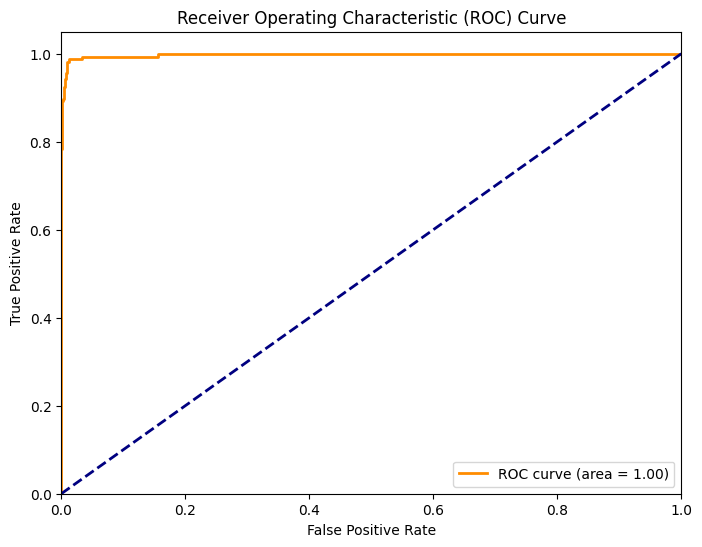

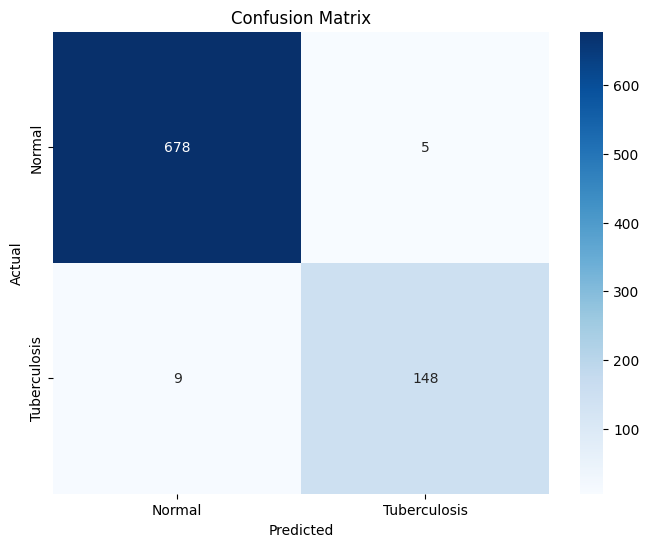

------------------------------
Evaluating EfficientNet with SGD )...
Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 29s 108ms/step - Precision: 0.1559 - Recall: 0.9918 - accuracy: 0.1617 - loss: 1.0786 - val_Precision: 0.1949 - val_Recall: 0.9236 - val_accuracy: 0.2726 - val_loss: 0.8075
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - Precision: 0.1795 - Recall: 0.8168 - accuracy: 0.3550 - loss: 0.7718 - val_Precision: 0.3305 - val_Recall: 0.5032 - val_accuracy: 0.7167 - val_loss: 0.6227
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - Precision: 0.2957 - Recall: 0.4481 - accuracy: 0.7397 - loss: 0.6029 - val_Precision: 0.4923 - val_Recall: 0.2038 - val_accuracy: 0.8119 - val_loss: 0.5276
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - Precision: 0.4511 - Recall: 0.2228 - accuracy: 0.8269 - loss: 0.5181 - val_Precision: 0.5312 - val_Recall: 0.1083 - val_accuracy: 0.8155 - val_loss: 0.4763
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - Precision: 0.6345 - Recall: 0.

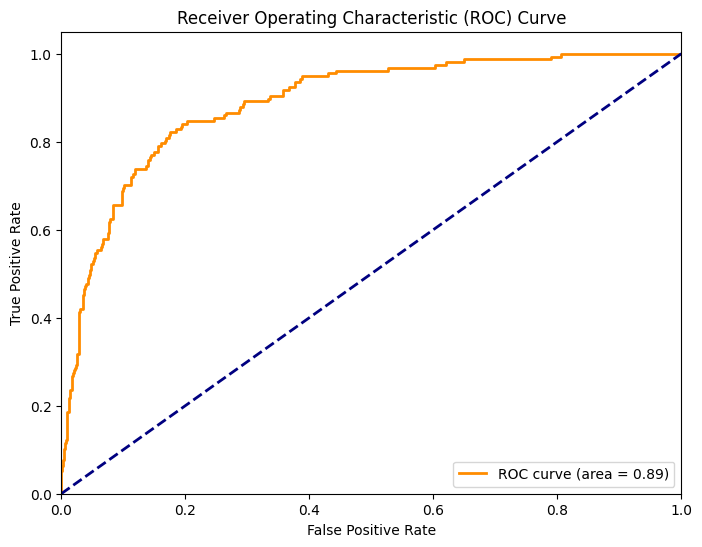

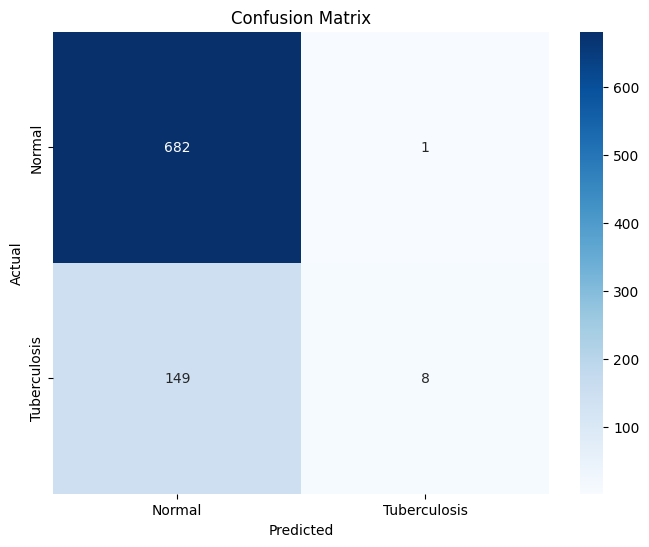

------------------------------
Evaluating EfficientNet with RMSprop )...
Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 32s 146ms/step - Precision: 0.7165 - Recall: 0.3730 - accuracy: 0.8619 - loss: 0.3029 - val_Precision: 0.9703 - val_Recall: 0.6242 - val_accuracy: 0.9262 - val_loss: 0.1535
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - Precision: 0.9706 - Recall: 0.7828 - accuracy: 0.9645 - loss: 0.0987 - val_Precision: 0.9424 - val_Recall: 0.8344 - val_accuracy: 0.9595 - val_loss: 0.0927
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - Precision: 0.9617 - Recall: 0.8720 - accuracy: 0.9727 - loss: 0.0798 - val_Precision: 0.9514 - val_Recall: 0.8726 - val_accuracy: 0.9679 - val_loss: 0.0764
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - Precision: 0.9701 - Recall: 0.9261 - accuracy: 0.9830 - loss: 0.0582 - val_Precision: 0.9427 - val_Recall: 0.9427 - val_accuracy: 0.9786 - val_loss: 0.0662
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - Precision: 0.9623 - Recall

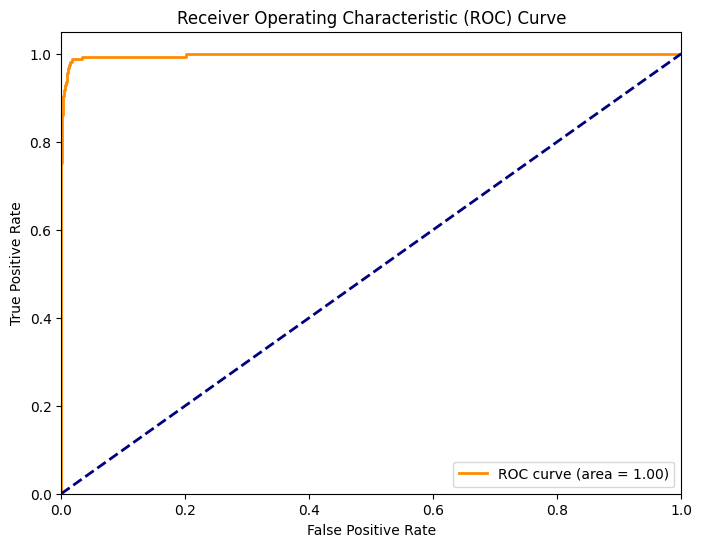

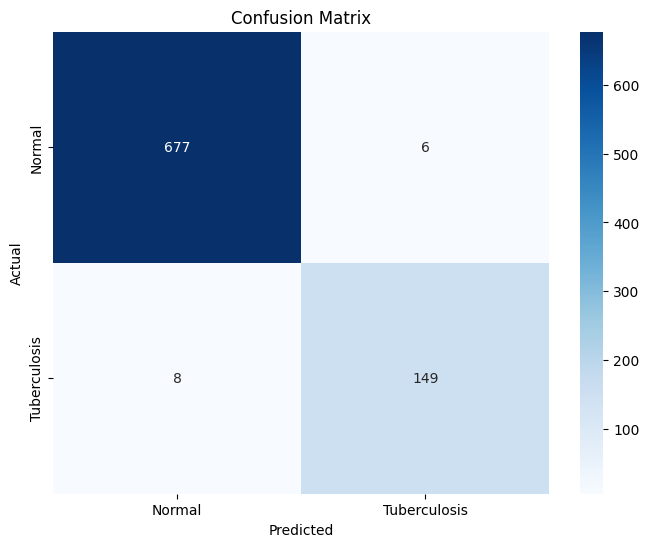

------------------------------
Evaluating EfficientNet with Adagrad )...
Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - Precision: 0.2945 - Recall: 0.5614 - accuracy: 0.7106 - loss: 0.6173 - val_Precision: 0.6364 - val_Recall: 0.0892 - val_accuracy: 0.8202 - val_loss: 0.4728
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - Precision: 0.6326 - Recall: 0.0992 - accuracy: 0.8496 - loss: 0.4463 - val_Precision: 0.5556 - val_Recall: 0.0318 - val_accuracy: 0.8143 - val_loss: 0.4176
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - Precision: 0.6202 - Recall: 0.0507 - accuracy: 0.8557 - loss: 0.3872 - val_Precision: 0.5714 - val_Recall: 0.0255 - val_accuracy: 0.8143 - val_loss: 0.3959
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - Precision: 0.8204 - Recall: 0.0404 - accuracy: 0.8514 - loss: 0.3662 - val_Precision: 0.8000 - val_Recall: 0.0255 - val_accuracy: 0.8167 - val_loss: 0.3840
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - Precision: 0.7923 - Recall

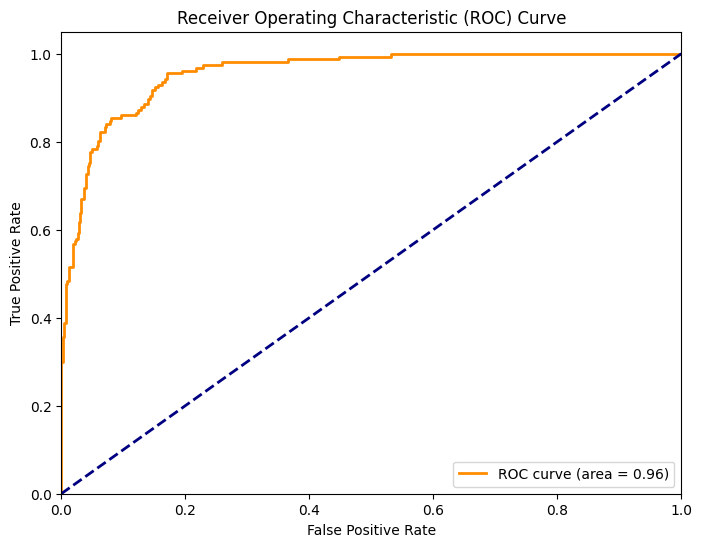

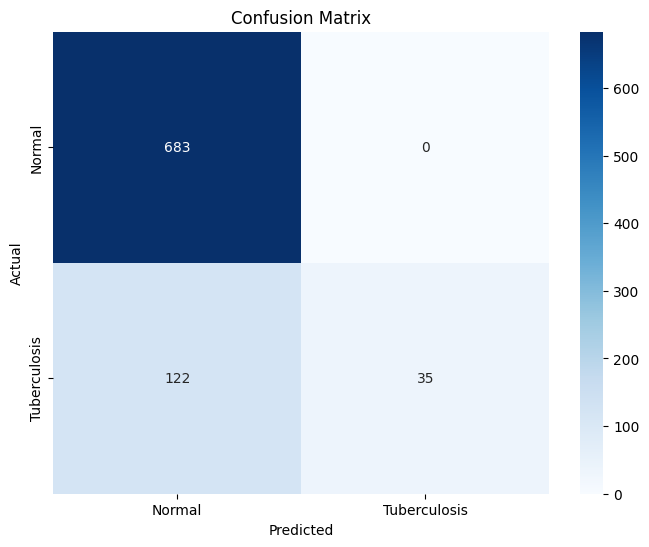

------------------------------


In [ ]:
!pip install tensorflow-addons
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad # Import optimizers


# Lower learning rate
learning_rate = 0.0001  # Adjust as needed



# Define a dictionary of optimizers
optimizers = {
    "Adam": Adam(learning_rate=learning_rate),
    "SGD": SGD(learning_rate=learning_rate),
    "RMSprop": RMSprop(learning_rate=learning_rate),
    "Adagrad": Adagrad(learning_rate=learning_rate)
}

for model_name, create_model_func in models.items():
    for optimizer_name, optimizer in optimizers.items():

            print(f"Evaluating {model_name} with {optimizer_name} )...")

            model = create_model_func()

            # Move model.compile inside the inner loop
            model.compile(optimizer=optimizer, loss='binary_crossentropy',
                          metrics=['accuracy', 'Precision', 'Recall'])

            start_time = time.time()



            history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=32)

            end_time = time.time()
            training_time = end_time - start_time
            print(f"Training time: {training_time:.2f} seconds")

            y_pred = model.predict(X_test)
            y_pred_classes = (y_pred > 0.5).astype(int).flatten()
            end_time = time.time()
            training_time = end_time - start_time
            print(f"Training time: {training_time:.2f} seconds")

            y_pred = model.predict(X_test)
            y_pred_classes = (y_pred > 0.5).astype(int).flatten()

            # Calculate and print metrics
            accuracy = accuracy_score(Y_test, y_pred_classes)
            precision = precision_score(Y_test, y_pred_classes)
            recall = recall_score(Y_test, y_pred_classes)
            f1 = f1_score(Y_test, y_pred_classes)
            roc_auc = roc_auc_score(Y_test, y_pred)

            print(f"\n{model_name} Results:")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"ROC AUC: {roc_auc:.4f}")



            # Classification report (includes precision, recall, F1-score)
            print("\nClassification Report:\n", classification_report(Y_test, y_pred_classes))

            # ROC curve
            fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()

            # Confusion matrix
            cm = confusion_matrix(Y_test, y_pred_classes)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tuberculosis'], yticklabels=['Normal', 'Tuberculosis'])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix')
            plt.show()


            print("-" * 30)

# **Plot the history grph of OUt perform model**

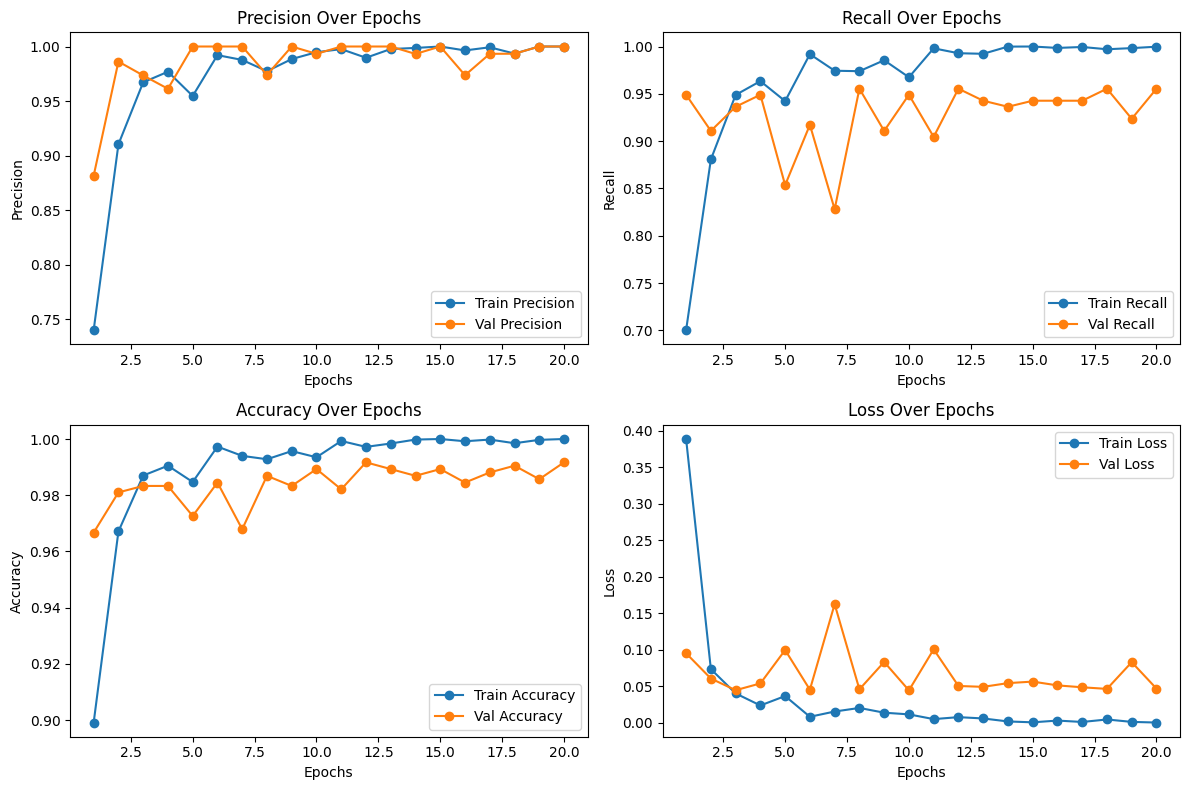

In [ ]:
import matplotlib.pyplot as plt

# Data from training history (simulated for plotting purposes)
epochs = list(range(1, 21))
train_precision = [0.7403, 0.9104, 0.9672, 0.9769, 0.9547, 0.9921, 0.9877, 0.9774, 0.9885, 0.9948,
                   0.9976, 0.9897, 0.9977, 0.9987, 1.0000, 0.9964, 0.9993, 0.9935, 1.0000, 1.0000]
val_precision = [0.8817, 0.9862, 0.9735, 0.9613, 1.0000, 1.0000, 1.0000, 0.9740, 1.0000, 0.9933,
                 1.0000, 1.0000, 1.0000, 0.9932, 1.0000, 0.9737, 0.9933, 0.9934, 1.0000, 1.0000]
train_recall = [0.7003, 0.8806, 0.9488, 0.9634, 0.9423, 0.9919, 0.9744, 0.9739, 0.9855, 0.9675,
                0.9981, 0.9929, 0.9923, 0.9999, 1.0000, 0.9985, 0.9995, 0.9971, 0.9983, 0.9998]
val_recall = [0.9490, 0.9108, 0.9363, 0.9490, 0.8535, 0.9172, 0.8280, 0.9554, 0.9108, 0.9490,
              0.9045, 0.9554, 0.9427, 0.9363, 0.9427, 0.9427, 0.9427, 0.9554, 0.9236, 0.9554]
train_accuracy = [0.8991, 0.9671, 0.9870, 0.9905, 0.9847, 0.9973, 0.9940, 0.9928, 0.9957, 0.9935,
                  0.9993, 0.9972, 0.9984, 0.9998, 1.0000, 0.9992, 0.9998, 0.9985, 0.9997, 1.0000]
val_accuracy = [0.9667, 0.9810, 0.9833, 0.9833, 0.9726, 0.9845, 0.9679, 0.9869, 0.9833, 0.9893,
                0.9821, 0.9917, 0.9893, 0.9869, 0.9893, 0.9845, 0.9881, 0.9905, 0.9857, 0.9917]

# Plotting the training and validation metrics
plt.figure(figsize=(12, 8))

# Precision
plt.subplot(2, 2, 1)
plt.plot(epochs, train_precision, label='Train Precision', marker='o')
plt.plot(epochs, val_precision, label='Val Precision', marker='o')
plt.title('Precision Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Recall
plt.subplot(2, 2, 2)
plt.plot(epochs, train_recall, label='Train Recall', marker='o')
plt.plot(epochs, val_recall, label='Val Recall', marker='o')
plt.title('Recall Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# Accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Val Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
train_loss = [0.3888, 0.0736, 0.0403, 0.0238, 0.0367, 0.0083, 0.0155, 0.0204, 0.0139, 0.0116,
              0.0051, 0.0078, 0.0060, 0.0019, 0.0007, 0.0031, 0.0012, 0.0046, 0.0013, 0.0004]
val_loss = [0.0953, 0.0607, 0.0447, 0.0540, 0.0997, 0.0454, 0.1626, 0.0459, 0.0834, 0.0445,
            0.1007, 0.0505, 0.0493, 0.0544, 0.0565, 0.0513, 0.0487, 0.0465, 0.0831, 0.0469]

plt.subplot(2, 2, 4)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Val Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
